In [2]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [3]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [4]:
trans_data = spark.read.csv('D:/Code_Place/Data-Science/Scikit Learn/trasport/ts_transport_fitness_01_03_2022to31_03_2022.csv', inferSchema=True, header=True)
trans_data.printSchema()

root
 |-- slno: integer (nullable = true)
 |-- registrationNo: string (nullable = true)
 |-- vehicleClass: string (nullable = true)
 |-- status: string (nullable = true)
 |-- validFrom: string (nullable = true)
 |-- validTo: string (nullable = true)
 |-- transactiontType: string (nullable = true)
 |-- OfficeCd: string (nullable = true)
 |-- fromdate: string (nullable = true)
 |-- todate: string (nullable = true)



In [5]:
trans_data.count()

76657

In [6]:
trans_data.head(5)

[Row(slno=770352, registrationNo='TS07UC8621', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=500609, registrationNo='TS01UC2799', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=530243, registrationNo='TS01UA7497', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=16716, registrationNo='AP01V3757', vehicleClass='Trailer For Commercial Use', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=34122, registrat

In [21]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

+-------------------+-------------------+
|      skewness(_c0)|      kurtosis(_c0)|
+-------------------+-------------------+
|-0.3511757043707716|-1.0309084999246485|
+-------------------+-------------------+



In [6]:
trans_data.describe().show()

+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|summary|              slno|registrationNo|        vehicleClass|  status| validFrom|   validTo|transactiontType|         OfficeCd|  fromdate|    todate|
+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|  count|             76657|         76657|               76657|   76657|     76657|     76657|           76657|            76657|     76657|     76657|
|   mean| 713451.5525000979|          null|                null|    null|      null|      null|            null|             null|      null|      null|
| stddev|361718.45413726586|          null|                null|    null|      null|      null|            null|             null|      null|      null|
|    min|                90|       AAI3151|           Ambulance|APPROVED|01/02/202

In [7]:
df_main = trans_data.toPandas()
df_main.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022


In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [9]:
df = df_main.copy()
col_list = df.columns
print(col_list)

Index(['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd', 'fromdate', 'todate'],
      dtype='object')


In [10]:
df.replace(np.nan,0)


,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
...,...,...,...,...,...,...,...,...,...,...
76652,65180,AP10U5158,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76653,66091,AP11T3969,Goods Carriage,APPROVED,31/03/2022,30/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76654,69196,AP10V5554,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76655,66901,AP09U5575,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022


In [11]:
df.dtypes

slno                 int32
registrationNo      object
vehicleClass        object
status              object
validFrom           object
validTo             object
transactiontType    object
OfficeCd            object
fromdate            object
todate              object
dtype: object

In [12]:
df['registrationNo']

0        TS07UC8621
1        TS01UC2799
2        TS01UA7497
3         AP01V3757
4         AP01W8405
            ...    
76652     AP10U5158
76653     AP11T3969
76654     AP10V5554
76655     AP09U5575
76656    AP03TC1964
Name: registrationNo, Length: 76657, dtype: object

In [13]:
df['status'] = pd.Categorical(df['status'])
df['status'] = df.status.cat.codes
df['vehicleClass'] = pd.Categorical(df['vehicleClass'])
df['vehicleClass'] = df.vehicleClass.cat.codes
df['registrationNo'] = pd.Categorical(df['registrationNo'])
df['registrationNo'] = df.registrationNo.cat.codes
df['transactiontType'] = pd.Categorical(df['transactiontType'])
df['transactiontType'] = df.transactiontType.cat.codes
df['OfficeCd'] = pd.Categorical(df['OfficeCd'])
df['OfficeCd'] = df.OfficeCd.cat.codes
df['validFrom'] = pd.Categorical(df['validFrom'])
df['validFrom'] = df.validFrom.cat.codes
df['validTo'] = pd.Categorical(df['validTo'])
df['validTo'] = df.validTo.cat.codes

df.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,18563,12,0,10,2,4,0,01/03/2022,02/03/2022
1,500609,13019,12,0,10,3,4,0,01/03/2022,02/03/2022
2,530243,12715,12,0,10,3,4,0,01/03/2022,02/03/2022
3,16716,151,27,0,10,2,4,0,01/03/2022,02/03/2022
4,34122,257,12,0,10,2,4,0,01/03/2022,02/03/2022


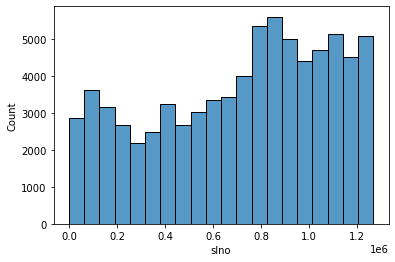

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="slno", bins=20)
plt.show()

array([[<AxesSubplot:title={'center':'slno'}>,
        <AxesSubplot:title={'center':'registrationNo'}>],
       [<AxesSubplot:title={'center':'status'}>, <AxesSubplot:>]],
      dtype=object)

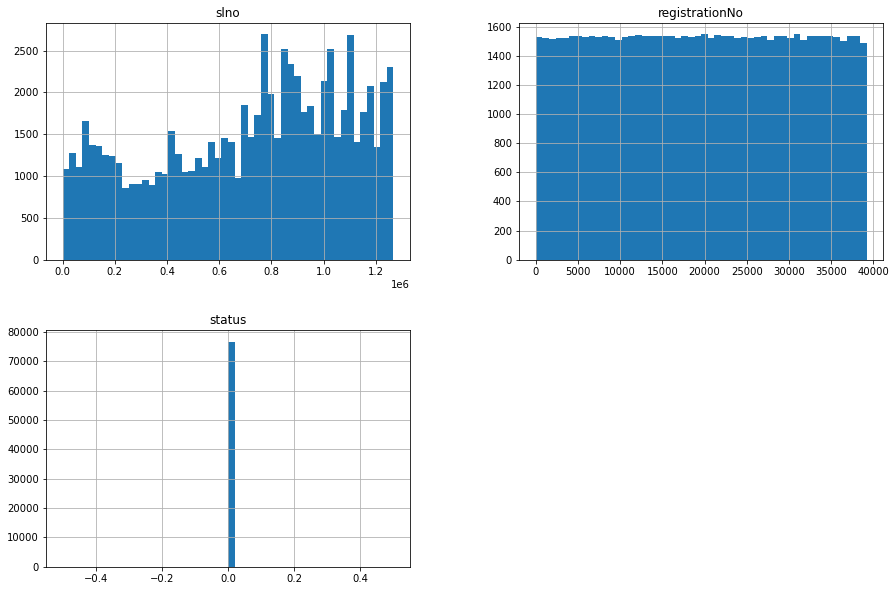

In [24]:
# # sns.heatmap(trans_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# sns.countplot(data=trans_data)
clist = ['slno', 'registrationNo', 'status']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [16]:
numaric_call = ['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd']
data = df[numaric_call]
data.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd
0,770352,18563,12,0,10,2,4,0
1,500609,13019,12,0,10,3,4,0
2,530243,12715,12,0,10,3,4,0
3,16716,151,27,0,10,2,4,0
4,34122,257,12,0,10,2,4,0


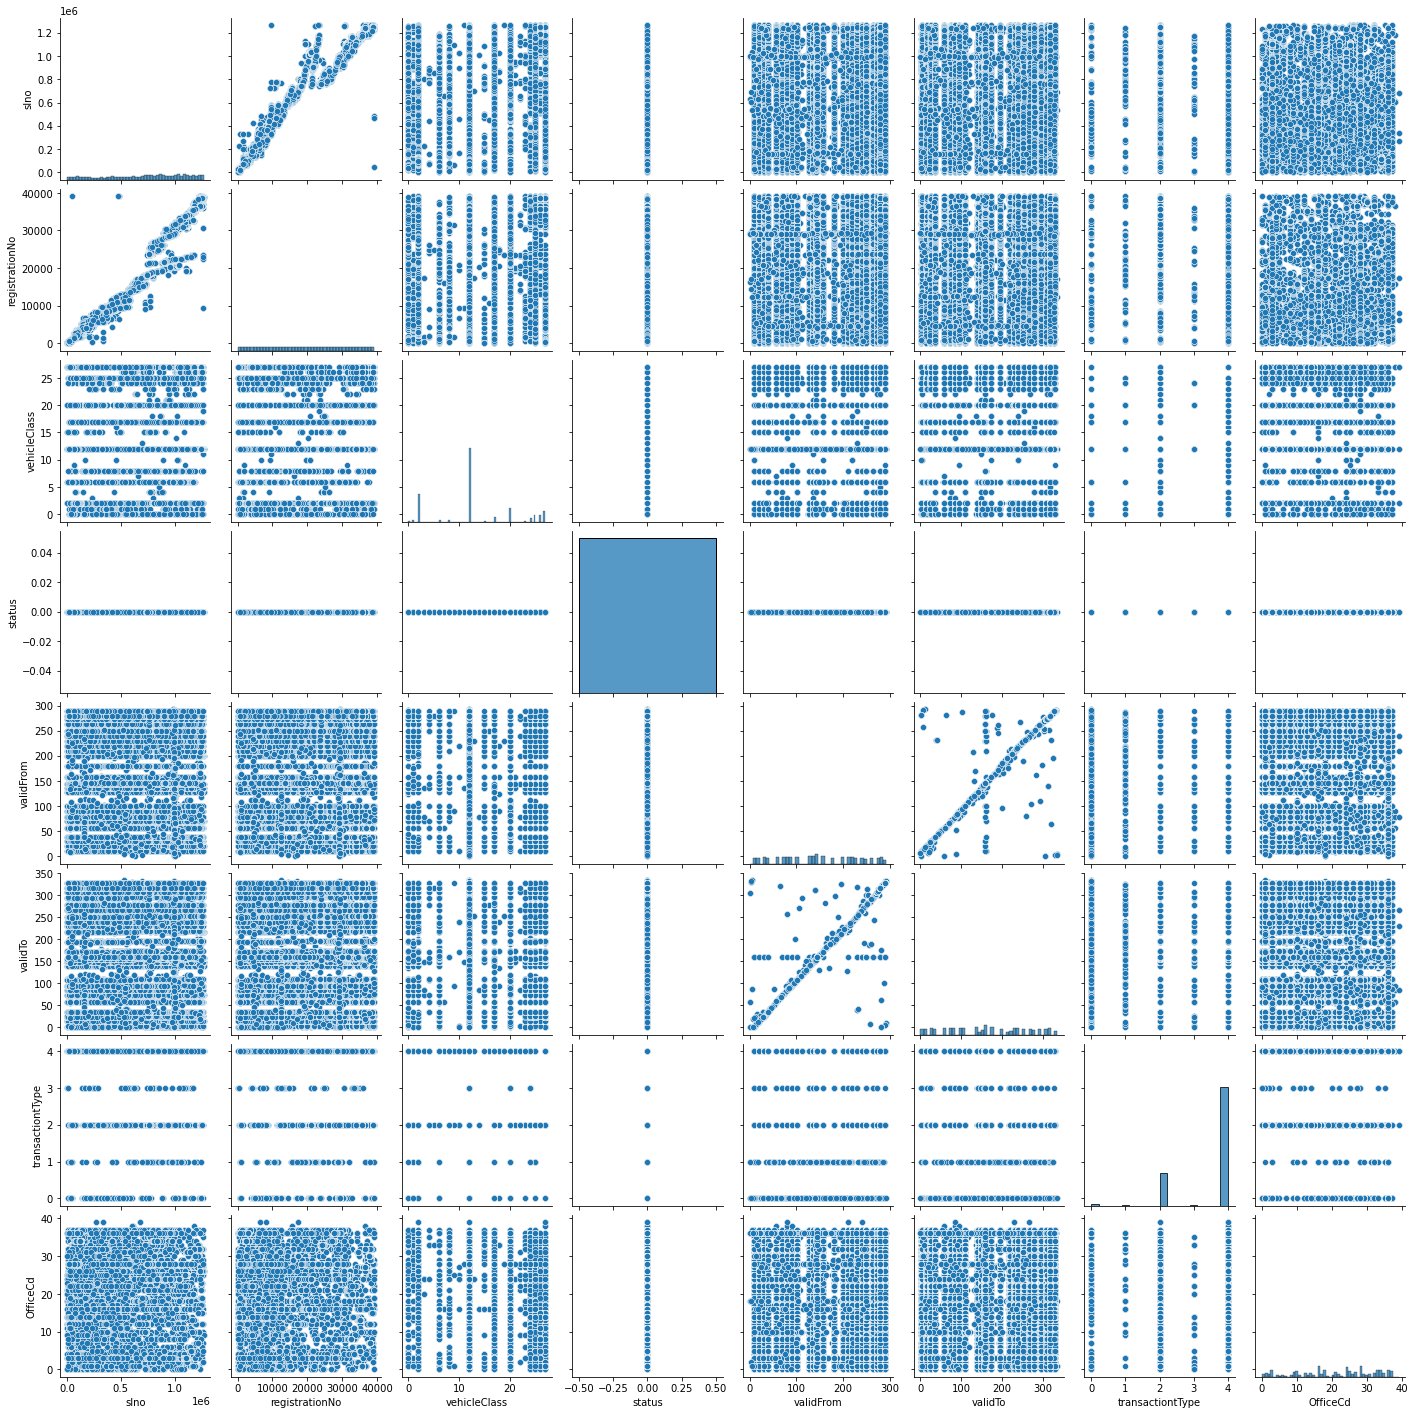

In [16]:
sns.pairplot(data=data)

In [18]:
dataset = data.copy()
dataset.isna().sum()

slno                0
registrationNo      0
vehicleClass        0
status              0
validFrom           0
validTo             0
transactiontType    0
OfficeCd            0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='validTo', ylabel='Density'>

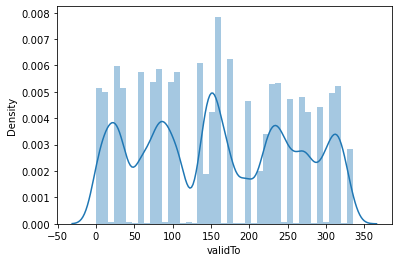

In [26]:
sns.distplot(dataset['validTo'])

In [27]:
dataset.corr()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd
slno,1.000000,0.960921,0.149757,NaN,-0.035174,-0.032010,-0.355003,0.060456
registrationNo,0.960921,1.000000,0.109688,NaN,-0.030956,-0.027831,-0.335368,0.115838
vehicleClass,0.149757,0.109688,1.000000,NaN,-0.023997,-0.023269,-0.226989,-0.214455
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
validFrom,-0.035174,-0.030956,-0.023997,NaN,1.000000,0.996735,-0.045825,0.016678
validTo,-0.032010,-0.027831,-0.023269,NaN,0.996735,1.000000,-0.046972,0.016271
transactiontType,-0.355003,-0.335368,-0.226989,NaN,-0.045825,-0.046972,1.000000,0.023923
OfficeCd,0.060456,0.115838,-0.214455,NaN,0.016678,0.016271,0.023923,1.000000


<AxesSubplot:>

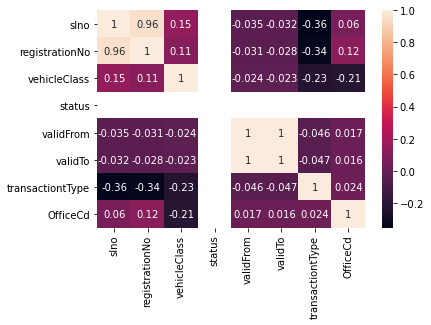

In [28]:
sns.heatmap(dataset.corr(),annot=True)

In [29]:
data.columns

Index(['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd'],
      dtype='object')

In [30]:
X= data[['slno', 'registrationNo', 'vehicleClass', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd']]
y = data['status']

In [31]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((53659, 7), (22998, 7))

In [32]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True]
No. of Non-Constant Features:  7


In [34]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

0


In [35]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

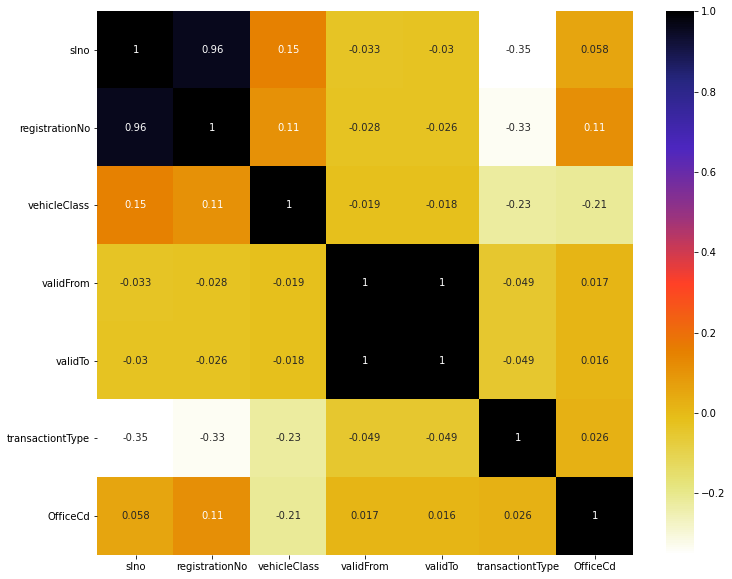

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 2


{'registrationNo', 'validTo'}

In [39]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [41]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [42]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [43]:
mp=10
X_train.head(2)

,slno,vehicleClass,validFrom,transactiontType,OfficeCd
64242,1087605,20,250,2,21
76524,59130,12,280,4,28


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

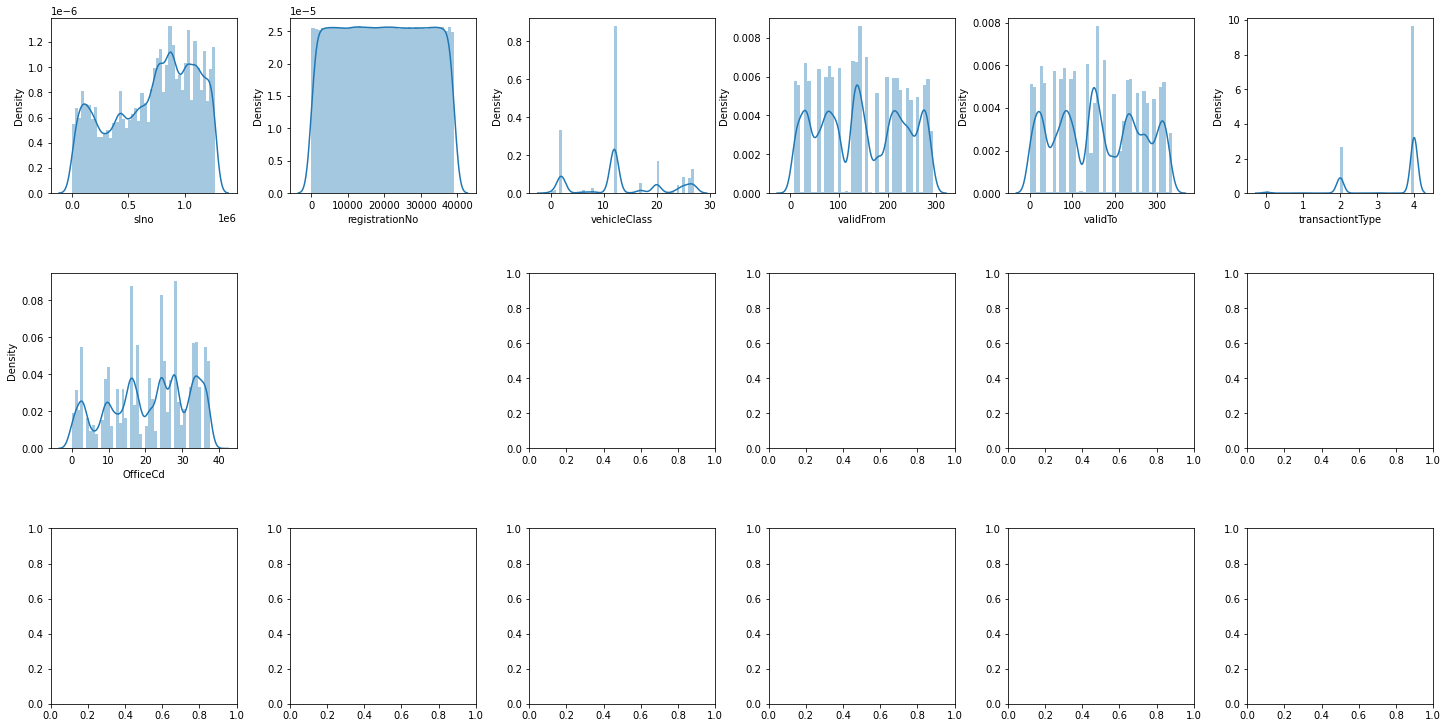

In [44]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [47]:
### KNeighbors

In [48]:
#%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [49]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.20 s
time to predict: 1.36 s
total: 1.56 s


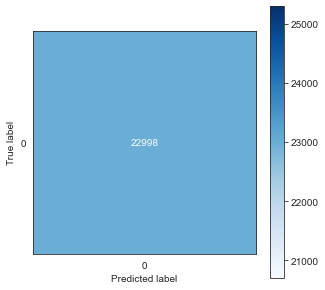

In [50]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [51]:
### RandomForest

In [52]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.16 s


In [53]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.68 s
time to predict: 0.15 s
total: 0.83 s


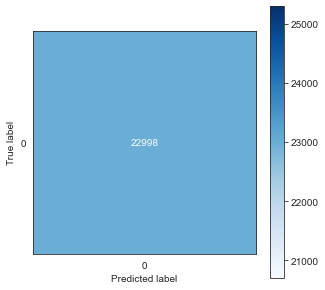

In [54]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [55]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22998

    accuracy                           1.00     22998
   macro avg       1.00      1.00      1.00     22998
weighted avg       1.00      1.00      1.00     22998



### DecisionTree

In [56]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 15.8 ms


In [57]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.02 s


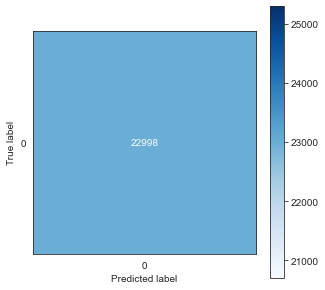

In [58]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [59]:
### Navie Bayes

In [60]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

c:\python\lib\site-packages\sklearn\naive_bayes.py:780: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
c:\python\lib\site-packages\sklearn\naive_bayes.py:781: RuntimeWarning: invalid value encountered in log
  np.log(smoothed_cc.reshape(-1, 1)))


In [61]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.01 s
time to predict: 0.01 s
total: 0.02 s


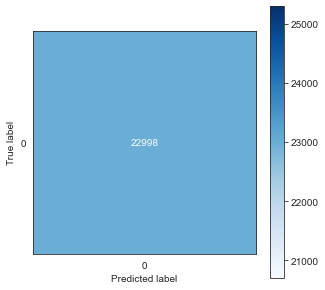

In [62]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [63]:
### AdaBoostClassifier

In [64]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model5.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 14.3 ms


In [65]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


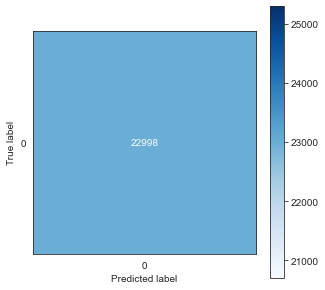

In [66]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [67]:
### CAT Boost

In [70]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.06 s


In [71]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.92 s
time to predict: 0.01 s
total: 0.93 s


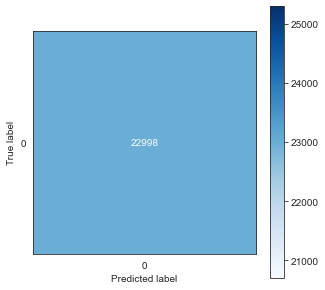

In [72]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [73]:
### GradientBoost

In [77]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 0 ns


In [78]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: -595.02 s
time to predict: 0.01 s
total: -595.01 s


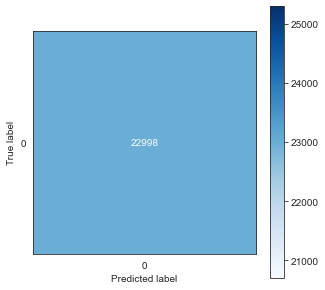

In [79]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [80]:
### ExtraTree

In [89]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
kNN,100.00%,100.00%,100.00%,100.00%,0.2,1.4,1.6
Random Forest,100.00%,100.00%,100.00%,100.00%,0.7,0.1,0.8
Decision Tree,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
Naive Bayes,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
AdaBoost,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
XG Boost,100.00%,100.00%,100.00%,100.00%,0.9,0.0,0.9
Cat Boost,100.00%,100.00%,100.00%,100.00%,-595.0,0.0,-595.0
